<a href="https://colab.research.google.com/github/Podushka228/MiTMOvPZ/blob/main/Zadanie_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Задание
1. Попытаться применить линейную регрессию к какой-либо паре зависимой и независимой переменных в собственном наборе
данных. Нарисовать график зависимости y от x с линией. Кроссвалидацией оценить ошибку (любая метрика ошибки на ваш
выбор).
2. Теперь при той же зависимой переменной y взять в качестве независимых переменных все (числовые) переменные набора
 данных. График нарисовать уже не получится, но кроссвалидацией всё равно можно оценить ошибку с той же выборкой. Стала
 ли ошибка меньше за счет того, что у модели больше информации?

 О наборе данных
 Любой, кто путешествует самолетом, знает, что периодические проблемы неизбежны. Рейсы могут быть задержаны или отменены из-за погодных условий, механических проблем или забастовок рабочих, а багаж может быть потерян, задержан, поврежден или украден. Учитывая, что многие авиакомпании сейчас взимают плату за багаж, проблемы с багажом особенно раздражают. Проблемы с багажом могут серьезно повлиять на лояльность клиентов и дорого стоить авиакомпаниям (авиакомпаниям часто приходится доставлять багаж).
 Авиаперевозчики сообщают правительству США о задержках, отменах рейсов, избыточном бронировании, опозданиях, жалобах на багаж и другой операционной статистике, которое собирает данные и сообщает их общественности.

 Набор данных содержит ежемесячные наблюдения с 2004 по 2010 год для United Airlines, American Eagle и Hawaiian Airlines. Переменные в наборе данных включают в себя:

Багаж — общее количество жалоб пассажиров на кражу содержимого багажа или на утерю, повреждение или неправильное направление багажа авиакомпании за этот месяц.
 Запланировано — общее количество рейсов, запланированных этой авиакомпанией в этом месяце.
 Отменено — общее количество рейсов, отмененных этой авиакомпанией в этом месяце.
 Enplaned — общее количество пассажиров, севших на самолет этой авиакомпании в этом месяце.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv("/content/baggagecomplaints.csv")
df

,Airline,Date,Month,Year,Baggage,Scheduled,Cancelled,Enplaned
0,American Eagle,01/2004,1,2004,12502,38276,2481,992360
1,American Eagle,02/2004,2,2004,8977,35762,886,1060618
2,American Eagle,03/2004,3,2004,10289,39445,1346,1227469
3,American Eagle,04/2004,4,2004,8095,38982,755,1234451
4,American Eagle,05/2004,5,2004,10618,40422,2206,1267581
...,...,...,...,...,...,...,...,...
247,United,08/2010,8,2010,14099,30637,344,4263211
248,United,09/2010,9,2010,9435,28072,161,3679517
249,United,10/2010,10,2010,9565,29144,140,3952549
250,United,11/2010,11,2010,8597,27318,104,3573268


(6.5, -0.5)

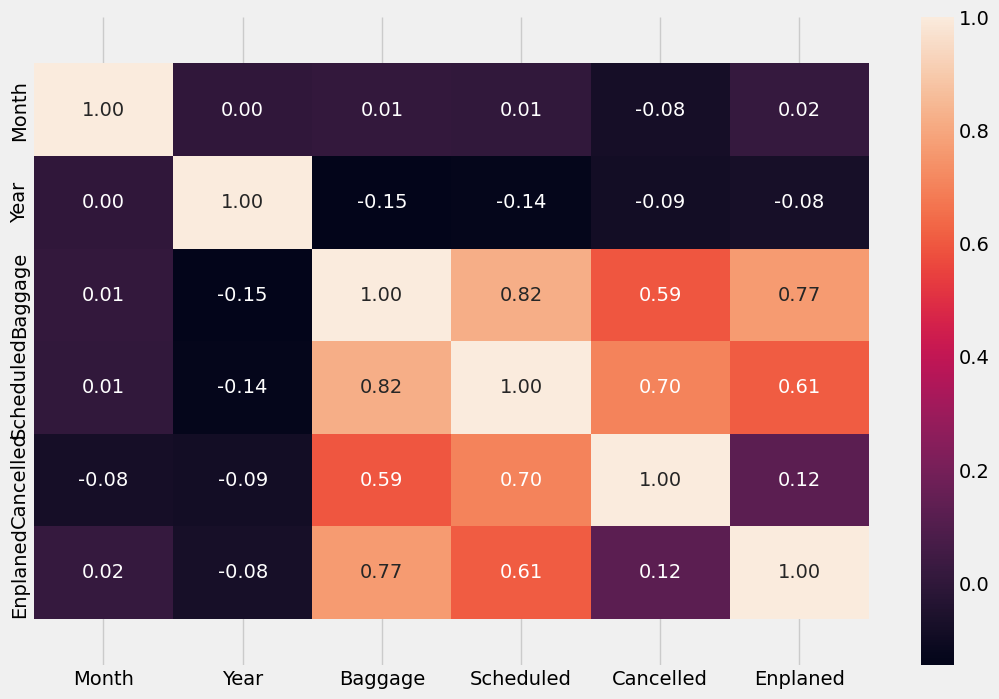

In [3]:
plt.figure(figsize = (12,8))
ax = sns.heatmap(df.corr(), annot = True, fmt = ".2f")
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

<Axes: xlabel='Baggage'>

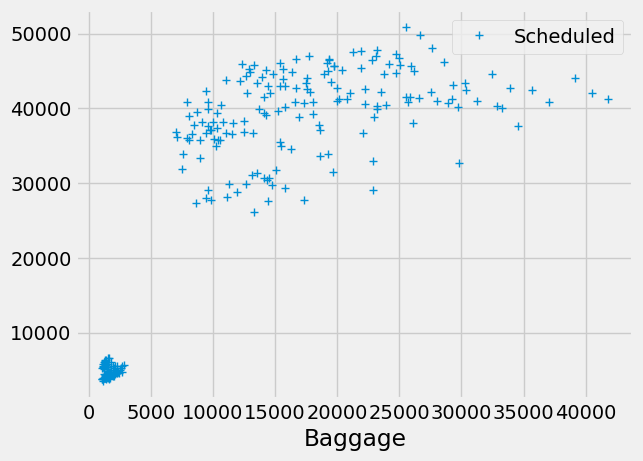

In [4]:
data = df.set_index('Baggage').sort_index()[['Scheduled']]
data.plot(style='+')

In [5]:
a = 5
def foo(x):
  return a * np.sqrt(x)

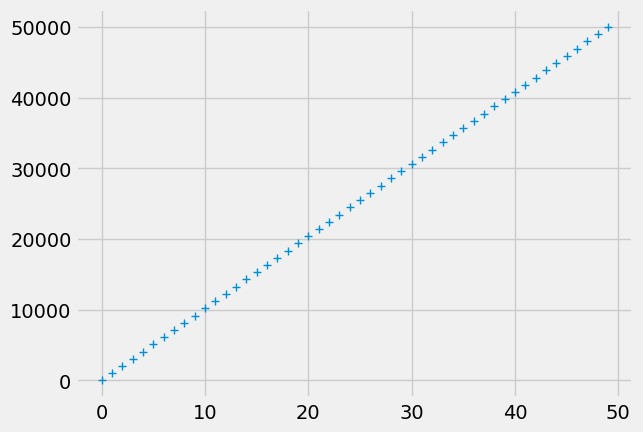

In [6]:
xx = np.linspace(0, 50000)
plt.plot(xx, '+')


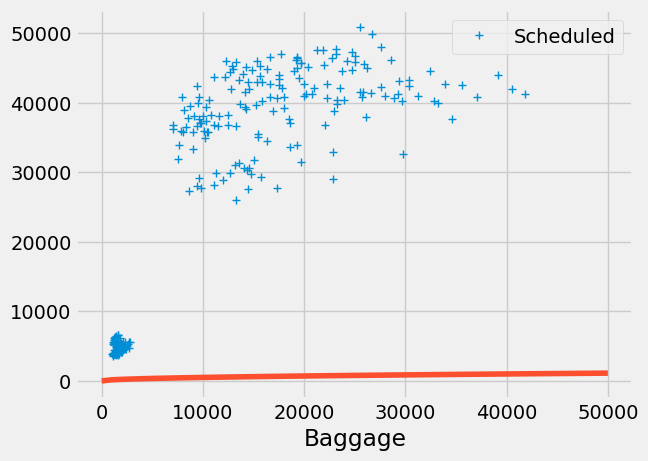

In [7]:
data.plot(style='+')
plt.plot(xx, foo(xx))
plt.show()

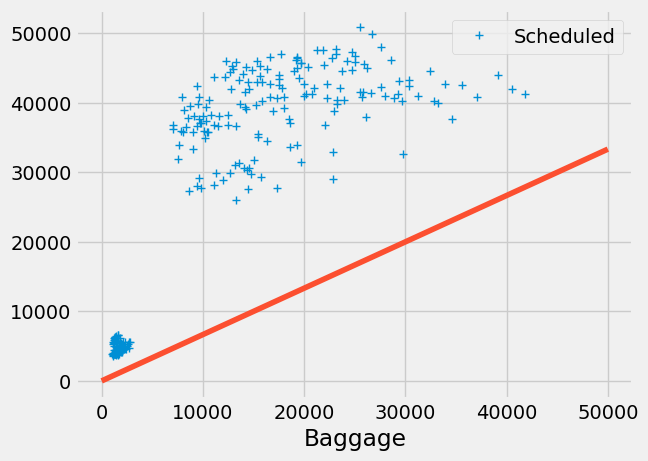

In [8]:
foo = lambda x: 2 * x/3 + 2
data.plot(style='+')
plt.plot(xx, foo(xx))
plt.show()

In [9]:
X = data.index.values.reshape(-1, 1)
xx = np.linspace(data.index.min(), data.index.max(), 100).reshape(-1, 1)
print(X.shape, xx.shape)

(252, 1) (100, 1)


[1.39812566] 10492.738811784322


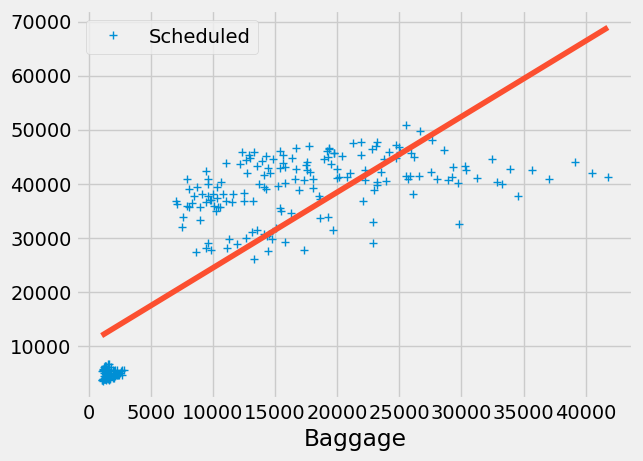

In [10]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X, data.Scheduled)
print(linear.coef_, linear.intercept_)
a = linear.coef_[0]
b = linear.intercept_
data.plot(style='+')
plt.plot(xx, a * xx + b)
plt.show()

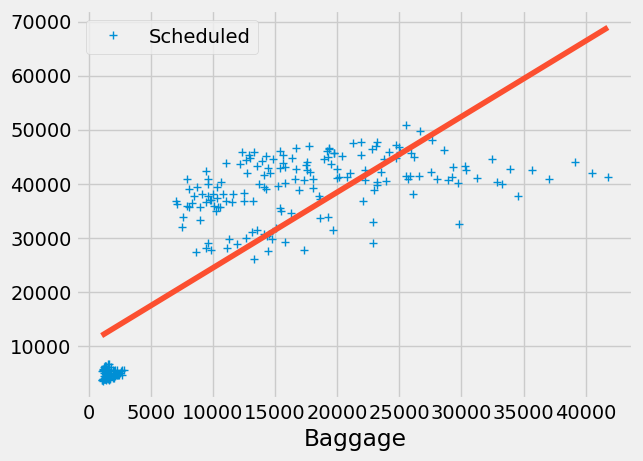

In [11]:
data.plot(style='+')
plt.plot(xx, linear.predict(xx))
plt.show()

In [ ]:
# Кроссвалидация

In [12]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(32, test_size=2, random_state=13)
cv

ShuffleSplit(n_splits=32, random_state=13, test_size=2, train_size=None)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [22]:
from sklearn.model_selection import cross_val_score
score = pd.DataFrame(columns=['mean', 'std'])
for n in range(40):
  model = Pipeline([('poly', PolynomialFeatures(degree=n)),
                    ('linear', LinearRegression(fit_intercept=False))])
  sc = cross_val_score(model, X, data.Scheduled, cv=cv, scoring='neg_mean_squared_error')
  score.loc[n] = [-sc.mean(), sc.std()]
score

,mean,std
0,2.784110e+08,1.447937e+08
1,1.223591e+08,7.685817e+07
2,4.421746e+07,3.744797e+07
3,2.788262e+07,2.860198e+07
4,3.073708e+07,2.688484e+07
5,3.666335e+07,3.969045e+07
6,8.230013e+07,9.013095e+07
7,4.758577e+08,3.386143e+08
8,6.429942e+08,4.134163e+08
9,7.724835e+08,4.713945e+08


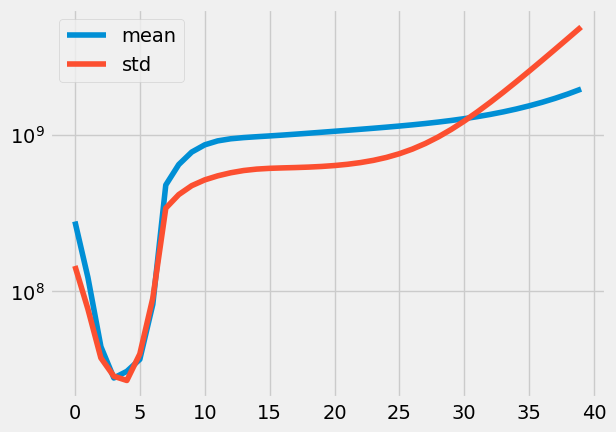

In [23]:
score.plot(logy=True)
plt.show()

2. Теперь при той же зависимой переменной y взять в качестве независимых переменных все (числовые) переменные набора
данных. График нарисовать уже не получится, но кроссвалидацией всё равно можно оценить ошибку с той же выборкой. Стала
ли ошибка меньше за счет того, что у модели больше информации?

In [16]:
XX= df.drop(['Airline','Date','Month','Year','Scheduled'],axis=1)
XX

,Baggage,Cancelled,Enplaned
0,12502,2481,992360
1,8977,886,1060618
2,10289,1346,1227469
3,8095,755,1234451
4,10618,2206,1267581
...,...,...,...
247,14099,344,4263211
248,9435,161,3679517
249,9565,140,3952549
250,8597,104,3573268


In [17]:
yy=df['Scheduled']
yy

0      38276
1      35762
2      39445
3      38982
4      40422
       ...  
247    30637
248    28072
249    29144
250    27318
251    27619
Name: Scheduled, Length: 252, dtype: int64

In [18]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(32, test_size=2, random_state=13)
cv

ShuffleSplit(n_splits=32, random_state=13, test_size=2, train_size=None)

In [20]:
from sklearn.model_selection import cross_val_score
score = pd.DataFrame(columns=['mean', 'std'])
for n in range(40):
  model = Pipeline([('poly', PolynomialFeatures(degree=n)),
                    ('linear', LinearRegression(fit_intercept=False))])
  sc = cross_val_score(model, XX, yy, cv=cv, scoring='neg_mean_squared_error')
  score.loc[n] = [-sc.mean(), sc.std()]
score

,mean,std
0,3.280848e+08,1.425347e+08
1,6.410993e+07,7.102782e+07
2,2.720373e+07,5.166686e+07
3,3.766727e+07,6.518843e+07
4,6.939857e+07,1.062256e+08
5,1.457733e+09,4.065304e+09
6,1.950668e+09,8.984380e+09
7,1.505943e+09,6.195970e+09
8,9.471412e+10,3.703712e+11
9,5.612873e+09,1.776252e+10


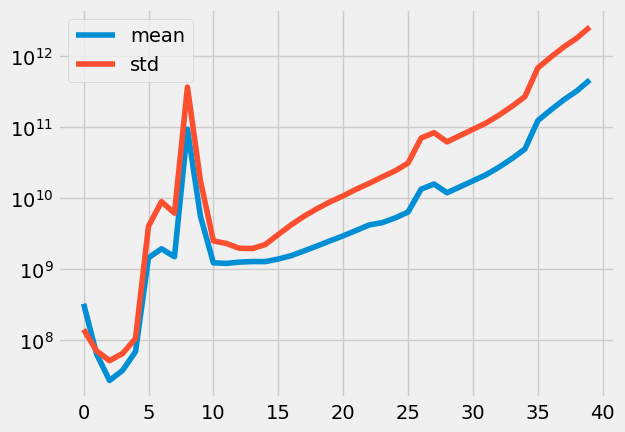

In [21]:
score.plot(logy=True)
plt.show()